In [42]:
import numpy as np
import pandas as pd
import scipy as spc
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import linalg as lg

In [17]:
def dot(coefs, roots):
    return sum(c * r for c, r in zip(coefs, roots))   


def enter_data():
    rows, columns = [int(i) for i in input().split()]
    return [[float(number) for number in input().split()] for _ in range(rows)]


def make_trian(matrix):
    pos = [0 for _ in range(len(matrix))]
    for i, row in enumerate(matrix):
        for elem in row:
            if elem == 0:
                pos[i] += 1
            else:
                break
    return [x for _, x in sorted(zip(pos, matrix))]


def direct_method(reс_matrix):
    reс_matrix = make_trian(reс_matrix)
    for i in range(len(reс_matrix[:-1])):
        s = 0
        for elem in reс_matrix[i][:-1]:
            if abs(elem) <= 0.000001:
                s += 1
            else:
                break
        if s == len(reс_matrix[i][:-1]):
            break
        for j in range(len(reс_matrix[i + 1:])):
            j += i + 1
            factor = -(reс_matrix[j][s]/reс_matrix[i][s])
            for m in range(i, len(reс_matrix[0])):
                reс_matrix[j][m] += factor * reс_matrix[i][m]
                
        reс_matrix = make_trian(reс_matrix)
    return reс_matrix 


def reverse_method(trian_matrix):
    roots = []
    for i in range(len(trian_matrix) - 1, -1, -1):
        root = (trian_matrix[i][-1] - dot(roots, trian_matrix[i][i + 1:-1])) / trian_matrix[i][i]
        roots.insert(0, root)
    return roots
        

def check_status(rec_matrix):
    for row in rec_matrix:
        c = 0
        for element in row[:-1]:
            if abs(element) <= 0.000001:
                c += 1
        if c == len(row) - 1 and abs(row[-1]) > 0:
            return 0   
    if len(rec_matrix) < len(rec_matrix[0][:-1]):
        return 2
    return 1


def delete_zeros_rows(matrix):
    for index, row in enumerate(matrix):
        if sum([abs(i) for i in row]) == 0:
            matrix = matrix[:index]
            break
    return matrix
    

def mnk(matrix):
    matrix = np.array(matrix)
    result = []
    for i in range(len(matrix[0, :-1])):
        tmp = []
        for j in range(len(matrix[0])):
            tmp.append(dot(matrix[:, i], matrix[:, j]))
        result.append(tmp)
    return result
    
    
def gauss_mnk_method():
    eq_sys = enter_data()
    dot_matrix = mnk(eq_sys)
    trian_matrix = direct_method(dot_matrix)
    trian_matrix = delete_zeros_rows(trian_matrix)
    status = check_status(trian_matrix)
    roots = reverse_method(trian_matrix)
    print(' '.join([str(i) for i in roots]))
    

if __name__ == '__main__':
    gauss_mnk_method()

5 3
1 0 1.96
1 0.693 3.325
1 1.098 4.128
1 1.386 4.700
1 1.609 5.081
1.969065635523694 1.953337196485903


In [37]:
A = np.e ** 1.969065635523694
A

7.163979592123005

In [38]:
q = 1.953337196485903
q

1.953337196485903

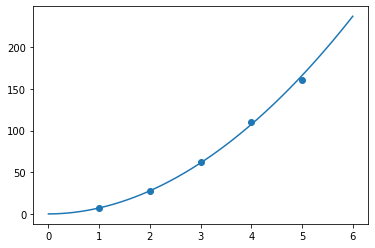

In [39]:
x = np.linspace(0, 6, 100)
plt.plot(x,np.vectorize(lambda x: A * x ** q)(x))
plt.scatter([1, 2, 3, 4, 5], [7.1, 27.8, 62.1, 110, 161])

In [44]:
def test(x):
    return np.sin(x)
    
    
def create_A_b_matrix(dots, power, func=test):
    A, b = [], []
    for dot in dots:
        A.append([dot ** n for n in range(power + 1)])
        b.append(func(dot))
    return np.array(A), np.array(b)


def solve(A, b):
    return lg.solve(A, b)


def make_visualization(w, power, r=np.linspace(0, 1, 100)):
    plt.plot(r, np.vectorize(test)(r))
    plt.plot(r, np.vectorize(lambda x: np.dot(w, [x ** n for n in range(power + 1)]))(r))
    
    
def epoch(dots, power):
    A, b = create_A_b_matrix(dots, power)
    w = solve(A, b)
    make_visualization(w, power)

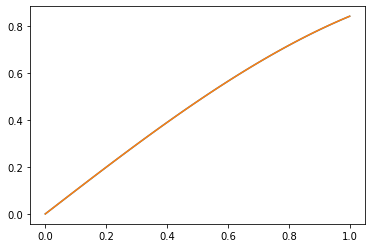

In [47]:
epoch([0, 0.3333, 0.6666, 1], 3)